# Instance Segmentation Task

## Installation and Setup
For installation and setting up the repo, please refer to the [Installation Notebook](000_install.ipynb). 

In [1]:
import os
from utils.io import setup_repo

# Setup repo and checkout to the branch with the tutorials
setup_repo(
    git_url="https://github.com/openvinotoolkit/training_extensions.git",
    branch='tutorials/cvpr24',
)
os.getcwd()

'/home/sakcay/projects/training_extensions'

The above code will setup the repo, change the directory to the root directory of the repo, so we have access to all the files and folders in the repo.

## Prepare the Data

The first step is to prepare the dataset. If you haven't downloaded the dataset yet, you could download it via the following:

In [2]:
from notebooks.utils.download import download_dataset

download_dataset(
    url=(
        "https://github.com/openvinotoolkit/training_extensions/releases/download"
        "/fruits_and_vegetables_dataset/fruits_and_vegetables.zip"
    ),
    extract_to="data/fruits_and_vegetables"
)

The dataset is already available in data/fruits_and_vegetables


In [1]:
data_root = "./data/fruits_and_vegetables"
work_dir = "./otx-workspace-ins_seg"

## Training with OTX Recipe

In [2]:
from otx.engine.utils.api import list_models

list_models(task="INSTANCE_SEGMENTATION", print_table=True)

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                                    OTX Recipes                                                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Task                  ┃ Model Name                    ┃ Recipe Path                                             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ INSTANCE_SEGMENTATION │ openvino_model                │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/openvino_model.yaml            │
│ INSTANCE_SEGMENTATION │ maskrcnn_r50                  │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_r50.yaml              │
│ INSTANCE_SEGMENTATION │ maskrcnn_r50_tile             │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_r50_tile.yaml         │
│ INSTANCE_SEGMENTATION │ maskrcnn_swint                │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_swint.yaml            │
│ INSTANCE_SEGMENTATION │ maskrcnn_efficientnetb2b      │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_efficientnetb2b.yaml  │
│ INSTANCE_SEGMENTATION │ rtmdet_inst_tiny              │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/rtmdet_inst_tiny.yaml          │
│ INSTANCE_SEGMENTATION │ maskrcnn_efficientnetb2b_tile │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_efficientnetb2b_tile… │
│                       │                               │ ml                                                      │
│ INSTANCE_SEGMENTATION │ rtmdet_inst_tiny_tile         │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/rtmdet_inst_tiny_tile.yaml     │
│ INSTANCE_SEGMENTATION │ maskrcnn_swint_tile           │ /home/harimkan/workspace/repo/otx-regression/src/otx/r… │
│                       │                               │ pe/instance_segmentation/maskrcnn_swint_tile.yaml       │
└───────────────────────┴───────────────────────────────┴─────────────────────────────────────────────────────────┘

['maskrcnn_r50_tile',
 'maskrcnn_r50',
 'rtmdet_inst_tiny',
 'maskrcnn_efficientnetb2b_tile',
 'maskrcnn_efficientnetb2b',
 'rtmdet_inst_tiny_tile',
 'maskrcnn_swint',
 'openvino_model',
 'maskrcnn_swint_tile']

In [3]:
from otx.engine import Engine

recipe = "/home/harimkan/workspace/repo/otx-regression/src/otx/recipe/instance_segmentation/maskrcnn_r50.yaml"
override_dataset_format = {"data.config.data_format": "datumaro"}

engine = Engine.from_config(config_path=recipe, data_root=data_root, work_dir=work_dir, **override_dataset_format)
engine.train(max_epochs=30)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filtering(dataset, self.config.data_format, self.config.unannotated_items_ratio)
/home/harimkan/workspace/repo/otx-regression/src/otx/cli/cli.py:389: UserWarning: Automatically infer label_info from the given dataset. Then, giving it to the OTXModel.__init__() argument. If you don't want this behavior, please use `--disable-infer-num-classes` option.
  warn(warning_msg, stacklevel=0)
/home/harimkan/workspace/repo/otx-regression/src/otx/algo/utils/mmengine_utils.py:183: UserWarning: The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([11, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from chec

┏━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name  ┃ Type     ┃ Params ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model │ MaskRCNN │ 44.0 M │
└───┴───────┴──────────┴────────┘

Trainable params: 43.8 M                                                                                           
Non-trainable params: 225 K                                                                                        
Total params: 44.0 M                                                                                               
Total estimated model params size (MB): 176

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:294: The number of training batches (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different 

/home/harimkan/workspace/repo/otx-regression/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=val/classes is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)


{'lr-SGD': tensor(0.0007),
 'lr-SGD-momentum': tensor(0.9000),
 'lr-SGD-1': tensor(0.0007),
 'lr-SGD-1-momentum': tensor(0.9000),
 'train/loss_rpn_cls': tensor(0.0009),
 'train/loss_rpn_bbox': tensor(0.0089),
 'train/loss_cls': tensor(0.0245),
 'train/loss_bbox': tensor(0.0609),
 'train/loss_mask': tensor(0.0419),
 'train/loss': tensor(0.1372),
 'train/data_time': tensor(0.0059),
 'train/iter_time': tensor(0.3329),
 'validation/data_time': tensor(0.0017),
 'validation/iter_time': tensor(0.0396),
 'val/map': tensor(0.9852),
 'val/map_50': tensor(1.),
 'val/map_75': tensor(1.),
 'val/map_small': tensor(-1.),
 'val/map_medium': tensor(0.9898),
 'val/map_large': tensor(0.9840),
 'val/mar_1': tensor(0.5904),
 'val/mar_10': tensor(0.9891),
 'val/mar_100': tensor(0.9901),
 'val/mar_small': tensor(-1.),
 'val/mar_medium': tensor(0.9940),
 'val/mar_large': tensor(0.9888),
 'val/map_per_class': tensor(-1.),
 'val/mar_100_per_class': tensor(-1.)}

## Evaluate torch model

In [4]:
engine.test()

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


/home/harimkan/workspace/repo/otx-regression/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=test/classes is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test/data_time       │   0.001640833681449294    │
│      test/iter_time       │    0.04140099510550499    │
│         test/map          │    0.9108194708824158     │
│        test/map_50        │    0.9688238501548767     │
│        test/map_75        │    0.9618988037109375     │
│      test/map_large       │    0.8980133533477783     │
│      test/map_medium      │    0.9840416312217712     │
│    test/map_per_class     │           -1.0            │
│      test/map_small       │            0.0            │
│        test/mar_1         │    0.5188226103782654     │
│        test/mar_10        │    0.9314554929733276     │
│       test/mar_100        │     0.93293696641922      │
│  test/mar_100_per_class   │           -1.0            │
│      test/mar_large       │     0.922534704208374     │
│      test/mar_medium      │    0.9897878766059875     │
│      test/mar_small       │            0.0            │
└───────────────────────────┴───────────────────────────┘

{'test/data_time': tensor(0.0016),
 'test/iter_time': tensor(0.0414),
 'test/map': tensor(0.9108),
 'test/map_50': tensor(0.9688),
 'test/map_75': tensor(0.9619),
 'test/map_small': tensor(0.),
 'test/map_medium': tensor(0.9840),
 'test/map_large': tensor(0.8980),
 'test/mar_1': tensor(0.5188),
 'test/mar_10': tensor(0.9315),
 'test/mar_100': tensor(0.9329),
 'test/mar_small': tensor(0.),
 'test/mar_medium': tensor(0.9898),
 'test/mar_large': tensor(0.9225),
 'test/map_per_class': tensor(-1.),
 'test/mar_100_per_class': tensor(-1.)}

## Explain torch model

In [5]:
from otx.core.config.explain import ExplainConfig

engine.explain(explain_config=ExplainConfig(postprocess=True), dump=True)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


[InstanceSegBatchPredEntity(batch_size=1, images=Image([[[[-1.2274, -1.1932, -1.1418,  ..., -0.9877, -0.9877, -0.9705],
          [-1.2103, -1.1932, -1.1589,  ..., -0.9705, -0.9705, -0.9534],
          [-1.2103, -1.2103, -1.1932,  ..., -0.9534, -0.9363, -0.9363],
          ...,
          [ 1.2728,  1.2557,  1.2557,  ...,  1.6667,  1.7009,  1.7352],
          [ 1.2899,  1.2899,  1.2728,  ...,  1.5982,  1.6324,  1.6495],
          [ 1.3070,  1.2899,  1.2899,  ...,  1.5468,  1.5639,  1.5982]],
 
         [[-1.1078, -1.0728, -1.0203,  ..., -0.9328, -0.9328, -0.9153],
          [-1.0903, -1.0728, -1.0378,  ..., -0.9153, -0.9153, -0.8978],
          [-1.0903, -1.0903, -1.0728,  ..., -0.8978, -0.8803, -0.8803],
          ...,
          [ 0.6954,  0.6779,  0.6779,  ...,  1.3081,  1.3431,  1.3782],
          [ 0.7129,  0.7129,  0.6954,  ...,  1.2381,  1.2731,  1.2906],
          [ 0.7304,  0.7304,  0.7129,  ...,  1.1856,  1.2206,  1.2381]],
 
         [[-1.1596, -1.1247, -1.0724,  ..., -0.8284,

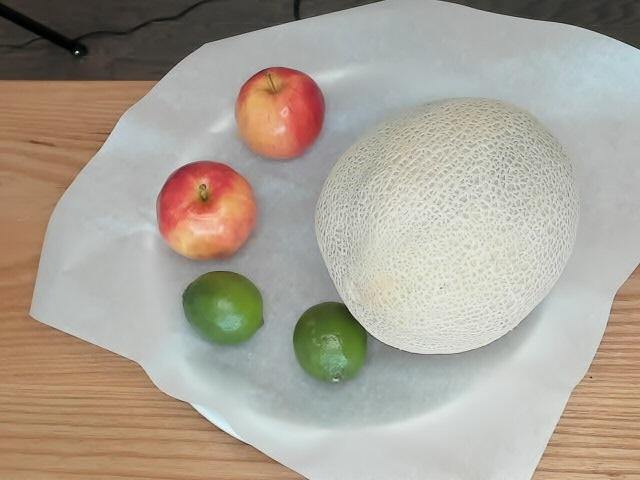

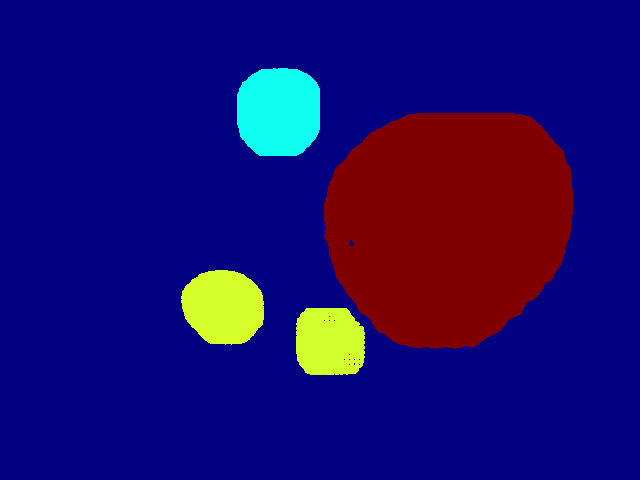

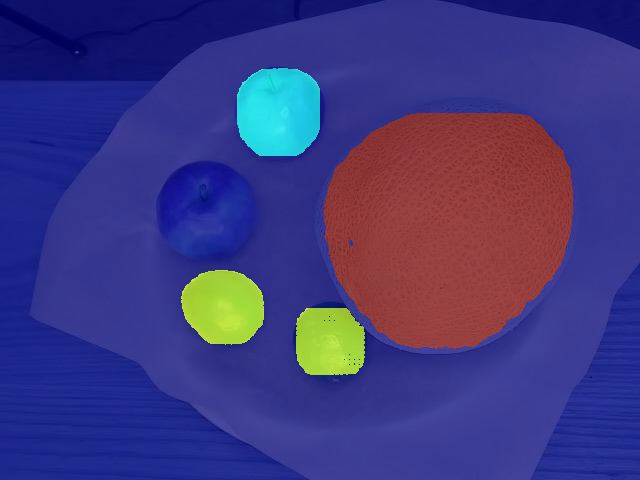

In [6]:
from PIL import Image
from IPython.display import display

origin_img = Image.open('/home/harimkan/workspace/repo/otx-regression/data/CVPR_demo_datumaro_seed0/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map_img = Image.open('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-ins_seg/saliency_map/my_photo_1___Copy___Copy___Copy_class_1_saliency_map.png')
overlay_img = Image.open('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-ins_seg/saliency_map/my_photo_1___Copy___Copy___Copy_class_1_overlay.png')

display(origin_img)
display(saliency_map_img)
display(overlay_img)

## Export to IR Model

In [7]:
exported_ir_model_path = engine.export()
exported_ir_model_path

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/harimkan/workspace/repo/otx-regression/src/otx/algo/instance_segmentation/maskrcnn.py:244: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  shape = (int(inputs.shape[2]), int(inputs.shape[3]))
/home/harimkan/workspace/repo/otx-regression/src/otx/algo/instance_segmentation/maskrcnn.py:251: TracerWarning: Using len to get tensor shape might cau

PosixPath('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-ins_seg/exported_model.xml')

## Evaluate IR Model

In [8]:
engine.test(checkpoint=exported_ir_model_path)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/utils/build.py:52: UserWarning: Set the default number of OpenVINO inference requests to 8.
            You can specify the value in config.
  warnings.warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/engine/engine.py:346: UserWarning: IR model supports inference only on CPU device. The device is changed automatic.
  warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/engine/utils/auto_configurator.py:395: UserWarning: For OpenVINO IR models, Update the following test 
	 transforms: [{'class_path': 'torchvision.transforms.v2.ToImage'}] 
	 transform_lib_type: TORCHVISION 
	 batch_size: 64 
And the tiler is disabled.
  warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filtering(dataset, self.config.data_format, self.config.u

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)


/home/harimkan/workspace/repo/otx-regression/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=test/classes is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/map          │    0.9065115451812744     │
│        test/map_50        │    0.9707204699516296     │
│        test/map_75        │    0.9506312012672424     │
│      test/map_large       │    0.8947840332984924     │
│      test/map_medium      │    0.9741799235343933     │
│    test/map_per_class     │           -1.0            │
│      test/map_small       │            0.0            │
│        test/mar_1         │    0.5170632004737854     │
│        test/mar_10        │    0.9284043908119202     │
│       test/mar_100        │    0.9298858642578125     │
│  test/mar_100_per_class   │           -1.0            │
│      test/mar_large       │    0.9212847352027893     │
│      test/mar_medium      │    0.9825693964958191     │
│      test/mar_small       │            0.0            │
└───────────────────────────┴───────────────────────────┘

{'test/map': tensor(0.9065),
 'test/map_50': tensor(0.9707),
 'test/map_75': tensor(0.9506),
 'test/map_small': tensor(0.),
 'test/map_medium': tensor(0.9742),
 'test/map_large': tensor(0.8948),
 'test/mar_1': tensor(0.5171),
 'test/mar_10': tensor(0.9284),
 'test/mar_100': tensor(0.9299),
 'test/mar_small': tensor(0.),
 'test/mar_medium': tensor(0.9826),
 'test/mar_large': tensor(0.9213),
 'test/map_per_class': tensor(-1.),
 'test/mar_100_per_class': tensor(-1.)}

## Explain IR model

In [9]:
from otx.core.config.explain import ExplainConfig

engine.explain(
    checkpoint=exported_ir_model_path,
    explain_config=ExplainConfig(postprocess=True),
    dump=True,
)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/utils/build.py:52: UserWarning: Set the default number of OpenVINO inference requests to 8.
            You can specify the value in config.
  warnings.warn(msg, stacklevel=1)
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)

[InstanceSegBatchPredEntity(batch_size=59, images=[Image([[[ 52,  57,  63,  ...,  64,  66,  67],
         [ 54,  55,  56,  ...,  66,  68,  69],
         [ 38,  41,  45,  ...,  69,  71,  72],
         ...,
         [195, 195, 194,  ..., 216, 218, 220],
         [198, 197, 196,  ..., 219, 222, 225],
         [200, 199, 197,  ..., 212, 214, 217]],
 
        [[ 53,  58,  61,  ...,  61,  63,  64],
         [ 55,  56,  57,  ...,  63,  65,  66],
         [ 40,  43,  47,  ...,  66,  68,  69],
         ...,
         [153, 153, 152,  ..., 186, 188, 190],
         [156, 155, 154,  ..., 189, 192, 195],
         [158, 157, 155,  ..., 182, 184, 187]],
 
        [[ 37,  42,  46,  ...,  54,  56,  57],
         [ 41,  40,  43,  ...,  56,  58,  59],
         [ 27,  29,  34,  ...,  59,  61,  62],
         ...,
         [113, 113, 112,  ..., 148, 150, 152],
         [116, 115, 114,  ..., 151, 154, 157],
         [118, 117, 115,  ..., 144, 146, 149]]], dtype=torch.uint8, ), Image([[[ 17,  19,  23,  ...,   

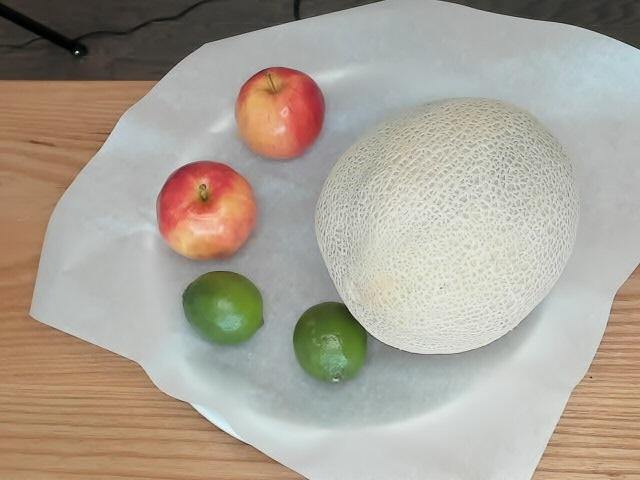

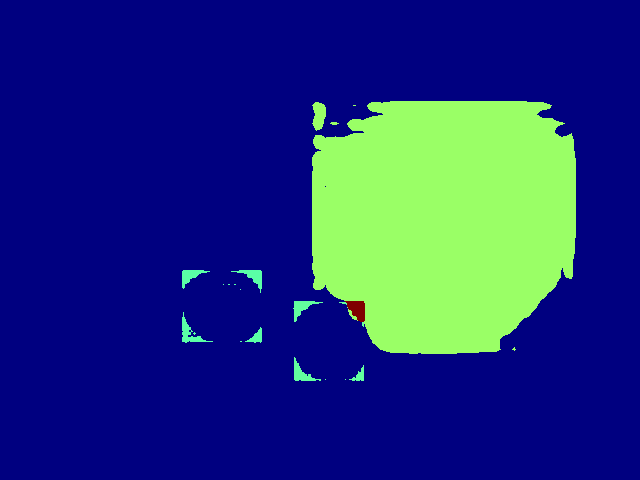

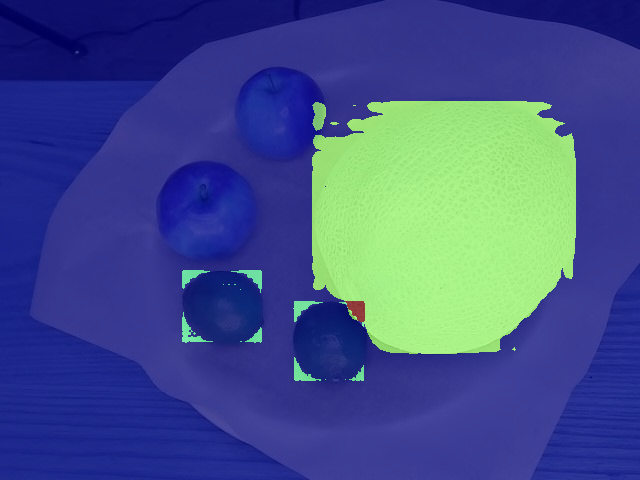

In [10]:
from PIL import Image
from IPython.display import display

origin_img = Image.open('/home/harimkan/workspace/repo/otx-regression/data/CVPR_demo_datumaro_seed0/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map_img = Image.open('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-ins_seg/saliency_map/my_photo_1___Copy___Copy___Copy_class_1_saliency_map.png')
overlay_img = Image.open('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-ins_seg/saliency_map/my_photo_1___Copy___Copy___Copy_class_1_overlay.png')

display(origin_img)
display(saliency_map_img)
display(overlay_img)